# DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION

# AUTHOR: SHIBBIR AHMED ARIF

# GRIP BATCH - JUNE 2021

# TASK-2: Prediction using Unsupervised Machine Learning

# Problem Statement: 

Predict the optimum number of clusturs and present it virtually using 'Iris' dataset

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
#check for nulls & duplicate values

print(iris.isnull().sum(),'\n\nNumber of duplicate rows: ', iris.duplicated().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64 

Number of duplicate rows:  1


In [6]:
#drop duplicate rows

iris.drop_duplicates(inplace=True)

iris.shape[0] #shows number of rows. similarly iris.shape[1] shows will show number of columns

149

# K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

# Finding the optimum number of clusters for k-means classification

In [8]:
x = iris.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the Results into One Line Graph

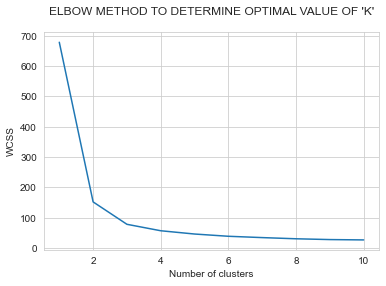

In [9]:
sns.set_style("whitegrid")
plt.plot(range(1, 11), wcss)
plt.title("ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note: From above graph using elbow method we can find the optimum number of clusters.This is when the elbow occurs when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Therefore,choosing number of clusters as "3"

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 101)
y_kmeans = kmeans.fit_predict(x)

# Visualization of The Clusters

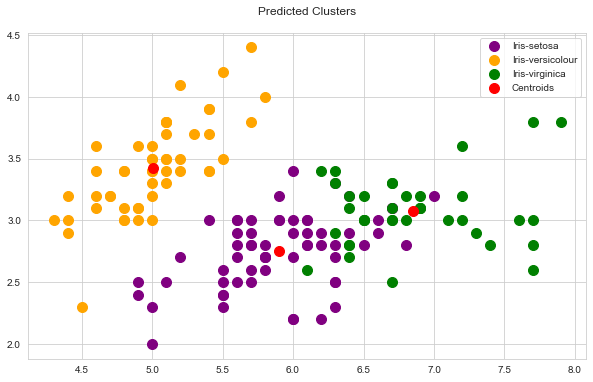

In [11]:
plt.figure(figsize=(10,6))
plt.title("Predicted Clusters\n")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Successfully Completed The Task